Esercizio di gruppo


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Import delle librerie

In [ ]:
df = pd.read_csv('train.csv')

#Lettura dataframe


In [ ]:
df.drop('id', axis=1, inplace=True)
df.head()

#Droppiamo la colonna id e con inplace sovrascriviamo il risultato nel df, mostriamo le prime 5 righe

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
df.info()

#Le info del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [ ]:
df.loc[df['accident'].isna()==True, 'accident'] = 'At least 1 accident or damage reported'
df.loc[df['clean_title'].isna()==True, 'accident'] = 'At least 1 accident or damage reported'
df.loc[df['clean_title'].isna()==True, 'clean_title'] = 'No'



In [1756]:
# Pulisco i NaN
# df.dropna(subset='accident', inplace=True)

In [ ]:
def print_fuel():
    df_fuel_type = df['fuel_type'].unique()
    print(len(df_fuel_type), df_fuel_type)
    for fuel in df_fuel_type:
        temp = len(df[df["fuel_type"]==fuel])
        print(f'{fuel}: {temp} -> {round(temp/len(df)*100,1)}%')
    return df_fuel_type
df_fuel_type= print_fuel()

#La funzione identifica tutti i tipi unici di carburante nella colonna fuel_type del DataFrame df, numero di occorrenze per ogni carburante e percentuale rispetto al totale
#ritorna poi la lista dei tipi di carburante unici, quindi ci aiuta a comprendere la distribuzione dei carburanti nel dataset per trovare anche anomalie etc


8 ['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Gasoline: 165940 -> 88.0%
E85 Flex Fuel: 5406 -> 2.9%
nan: 0 -> 0.0%
Hybrid: 6832 -> 3.6%
Diesel: 3955 -> 2.1%
Plug-In Hybrid: 521 -> 0.3%
–: 781 -> 0.4%
not supported: 15 -> 0.0%


In [ ]:
df.loc[df['fuel_type']==df_fuel_type[-2],'fuel_type']= df_fuel_type[0]
df.loc[df['fuel_type']==df_fuel_type[-1],'fuel_type']= df_fuel_type[0]
df.loc[df['fuel_type'].isna()==True,'fuel_type']= df_fuel_type[0]

#Sostituzione dei due ultimi tipi di carburante con il primo tipo di carburante e sostituiamo i valori mancanti con il primo tipo di carburante

In [1759]:
print_fuel()

5 ['Gasoline' 'E85 Flex Fuel' 'Hybrid' 'Diesel' 'Plug-In Hybrid']
Gasoline: 171819 -> 91.1%
E85 Flex Fuel: 5406 -> 2.9%
Hybrid: 6832 -> 3.6%
Diesel: 3955 -> 2.1%
Plug-In Hybrid: 521 -> 0.3%


array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid'],
      dtype=object)

In [ ]:
df.info()

#Info df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     188533 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      188533 non-null  object
 10  clean_title   188533 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [ ]:
new_df = df.copy()
new_df.drop(['int_col', 'fuel_type'], axis=1, inplace=True)

#Droppiamno le colonne che sono inutili ai fini analitici

In [ ]:
def gen_dict(df_temp: pd.DataFrame, colonna: str):
    unic = df_temp[colonna].unique()
    gen_dict= {}
    for i, dato in enumerate(unic):
        gen_dict[dato]=i
    return gen_dict

def string_uniq_to_int(lista: list, df_temp:pd.DataFrame):
    for col in lista:
        df_temp[col] = df_temp[col].map(gen_dict(df_temp, col))

#genera un dizionario che associa a ogni valore unico una colonna con un numero intero e utilizza il dizionario generato per sostituire
#i valori testuali di una colonna con numeri interi, dati categorici in dati numerici con .map.
        

In [ ]:
lista_col = ['brand', 'model', 'engine', 'transmission', 'ext_col', 'accident', 'clean_title']
string_uniq_to_int(lista_col,new_df)
new_df

#trasformazione da dati categorici a dati numerici

,brand,model,model_year,milage,engine,transmission,ext_col,accident,clean_title,price
0,0,0,2007,213000,0,0,0,0,0,4200
1,1,1,2002,143250,1,0,1,1,0,4999
2,2,2,2002,136731,2,0,2,0,0,13900
3,3,3,2017,19500,3,1,3,0,0,45000
4,4,4,2021,7388,4,2,3,0,0,97500
...,...,...,...,...,...,...,...,...,...,...
188528,9,12,2017,49000,12,1,4,0,0,27500
188529,4,965,2018,28600,250,3,4,1,0,30000
188530,4,932,2021,13650,17,2,4,0,0,86900
188531,5,929,2022,13895,883,22,85,1,1,84900


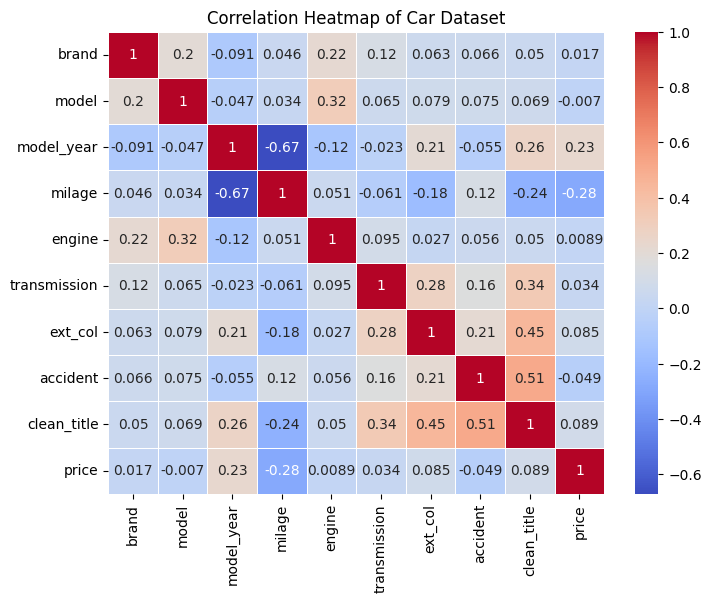

In [ ]:
# Compute correlation matrix
corr = new_df.corr()

# Plotting Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Car Dataset')
plt.show()

#matrice di correlazione di un dataframe, coefficiente di correlazione tra due colonne numeriche: +1 correlazione positiva quindi due variabili aumentano insieme, -1 perfetta negativa 
#quindi una variabile sale e l'altra scende, 0 nessuna correlazione.
#ci aiuta a identificare variabili altamente correlate o negative e/o deboli, in questo caso in base alla colorazione: più rossi forte correlazione, più blu meno correlazione.

In [ ]:
df_clean_title= df['clean_title'].unique()
print(len(df_clean_title))
for ct in df_clean_title:
    temp = len(df[df['clean_title']==ct])
    print(f'{ct}: {temp} -> {round(temp/len(df)*100,1)}%')

    #identifica tutti i valori unici nella colonna clean_title e calcola il numero di occorrenze e percentuale di ogni valore.

2
Yes: 167114 -> 88.6%
No: 21419 -> 11.4%


In [1766]:
df_brand = df['brand'].unique()
len(df_brand),df_brand

(57,
 array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
        'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
        'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
        'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
        'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
        'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
        'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
        'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
        'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
        'Polestar', 'Maybach'], dtype=object))

In [1767]:
df_model = df['model'].unique()
len(df_model), df_model

(1897,
 array(['Cooper S Base', 'LS V8', 'Silverado 2500 LT', ..., 'e-Golf SE',
        'Integra w/A-Spec Tech Package', 'IONIQ Plug-In Hybrid SEL'],
       dtype=object))

In [1768]:
df_accident = df['accident'].unique()
len(df_accident), df_accident

(2,
 array(['None reported', 'At least 1 accident or damage reported'],
       dtype=object))

In [ ]:

print('Non inc.:', round(len(df [df['accident']==df_accident[0]])/len(df)*100,1),'Inc.:', round(len(df[df['accident']==df_accident[1]])/len(df)*100,1))

#calcolo della percentuale di record per i valori della colonna accident, non inc quindi senza incidenti, inc con incidenti.

Non inc.: 67.2 Inc.: 32.8


In [1770]:
# Anno modelli
np.min(df['model_year']), np.max(df['model_year'])

(1974, 2024)

In [1771]:
# Prezzo
min_price = np.min(df['price'])
max_price= np.max(df['price'])
min_price, max_price

(2000, 2954083)

In [ ]:
min_price = np.min(df['price'])
max_price = df['price'].quantile(q=0.99)
print('Max price:', max_price)
df['PriceGroup'] = pd.cut(df['price'], bins=range(min_price, int(round(max_price)), int(round(max_price/20.0))), right=False)

price_year = df.groupby('PriceGroup').agg(
minYear=('model_year', 'min'),
maxYear=('model_year', 'max'),
meanYear=('model_year', 'mean'),
Count=('model_year', 'size')
)

print("Model year Rate by price Group:\n", price_year)

#trova il prezzo minimo e il percentile del max price, divide i prezzi sul range tra prezzo minimo e max price e raggruppa i dati in: anno minimo, massimo e medio dei veicoli 
#e numero di veicoli per fascia, quindi una relazione tra pezzo e l'anno di produzione dei veicoli.

Max price: 259500.0
Model year Rate by price Group:
                   minYear  maxYear     meanYear  Count
PriceGroup                                            
[2000, 14975)        1974     2023  2008.981445  37294
[14975, 27950)       1974     2024  2014.330242  46363
[27950, 40925)       1974     2024  2017.810681  38422
[40925, 53900)       1974     2024  2019.254802  25926
[53900, 66875)       1993     2024  2019.469306  12983
[66875, 79850)       1992     2024  2019.854539   8999
[79850, 92825)       1974     2024  2020.294814   5746
[92825, 105800)      1992     2024  2020.246644   3203
[105800, 118775)     1974     2024  2020.095267   1669
[118775, 131750)     1993     2024  2019.646865   1212
[131750, 144725)     1993     2024  2020.089701    903
[144725, 157700)     2001     2024  2019.765608    913
[157700, 170675)     2001     2023  2019.805556    432
[170675, 183650)     1995     2024  2019.893428    563
[183650, 196625)     2006     2024  2019.903084    454
[196625, 209

C:\Users\danie\AppData\Local\Temp\ipykernel_30764\1434552574.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_year = df.groupby('PriceGroup').agg(


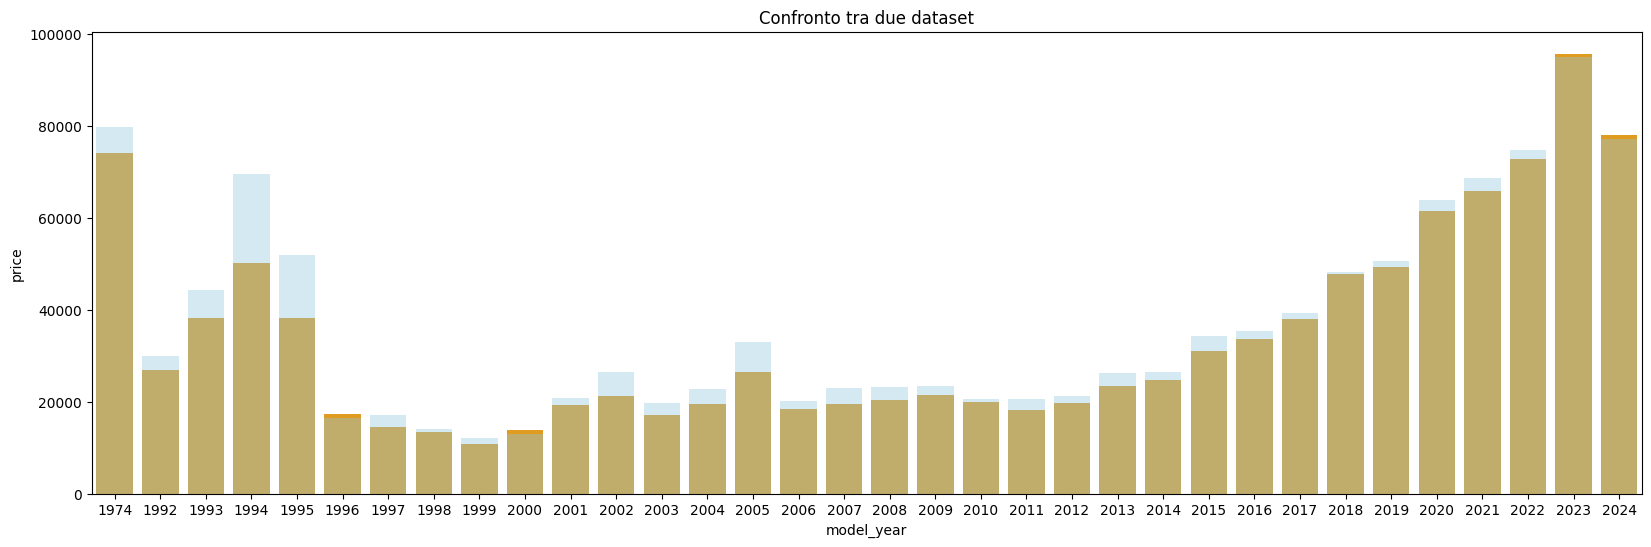

In [ ]:
mean_price_per_year = df.groupby('model_year')['price'].mean().reset_index()

mean_price_per_year_clean = df[df['accident']=='None reported'].groupby('model_year')['price'].mean().reset_index()
df_combined = pd.concat([mean_price_per_year, mean_price_per_year_clean])

# Creiamo il barplot
plt.figure(figsize=(20, 6))
sns.barplot(x='model_year', y='price', data=mean_price_per_year, color='orange')
sns.barplot(x='model_year', y='price', data=mean_price_per_year_clean, color='skyblue', alpha=0.4)
plt.title('Confronto tra due dataset')
plt.show()


#Media dei prezzi per anno, calcolo della media dei prezzi per ciascun anno e con reset index trasformiamo il risultato da una series a un df
#filtro per per quelli senza incidenti e calcolo media dei prezzi
#uguale per anno e poi concateniamo i due df
#differenze nei prezzi medi tra i veicoli con e senza incidenti per ciascun anno di modello, pattern significativi per esempio se i veicoli
#senza incidenti hanno un prezzo più alto 

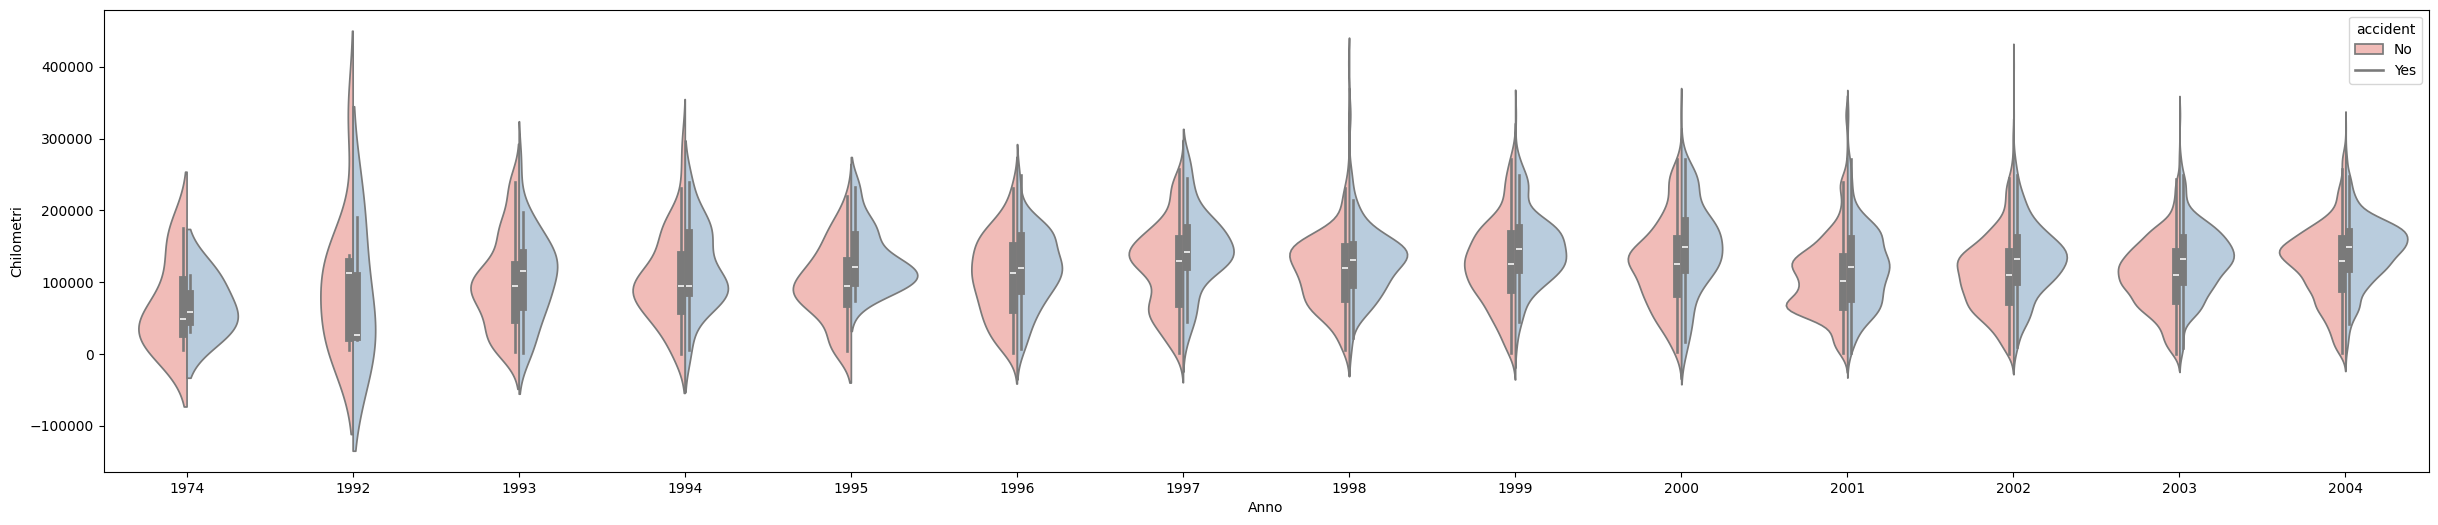

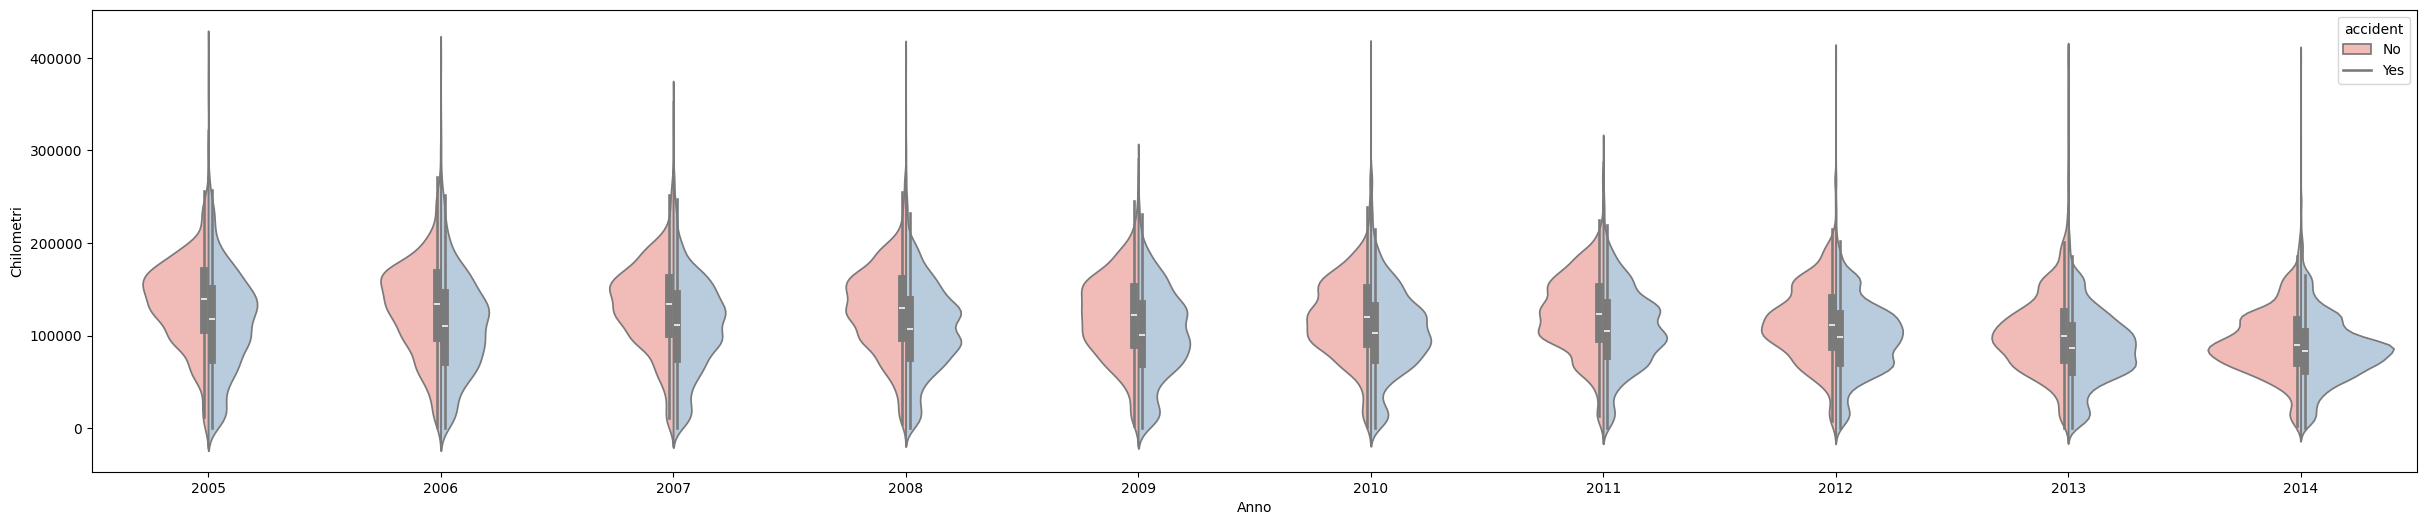

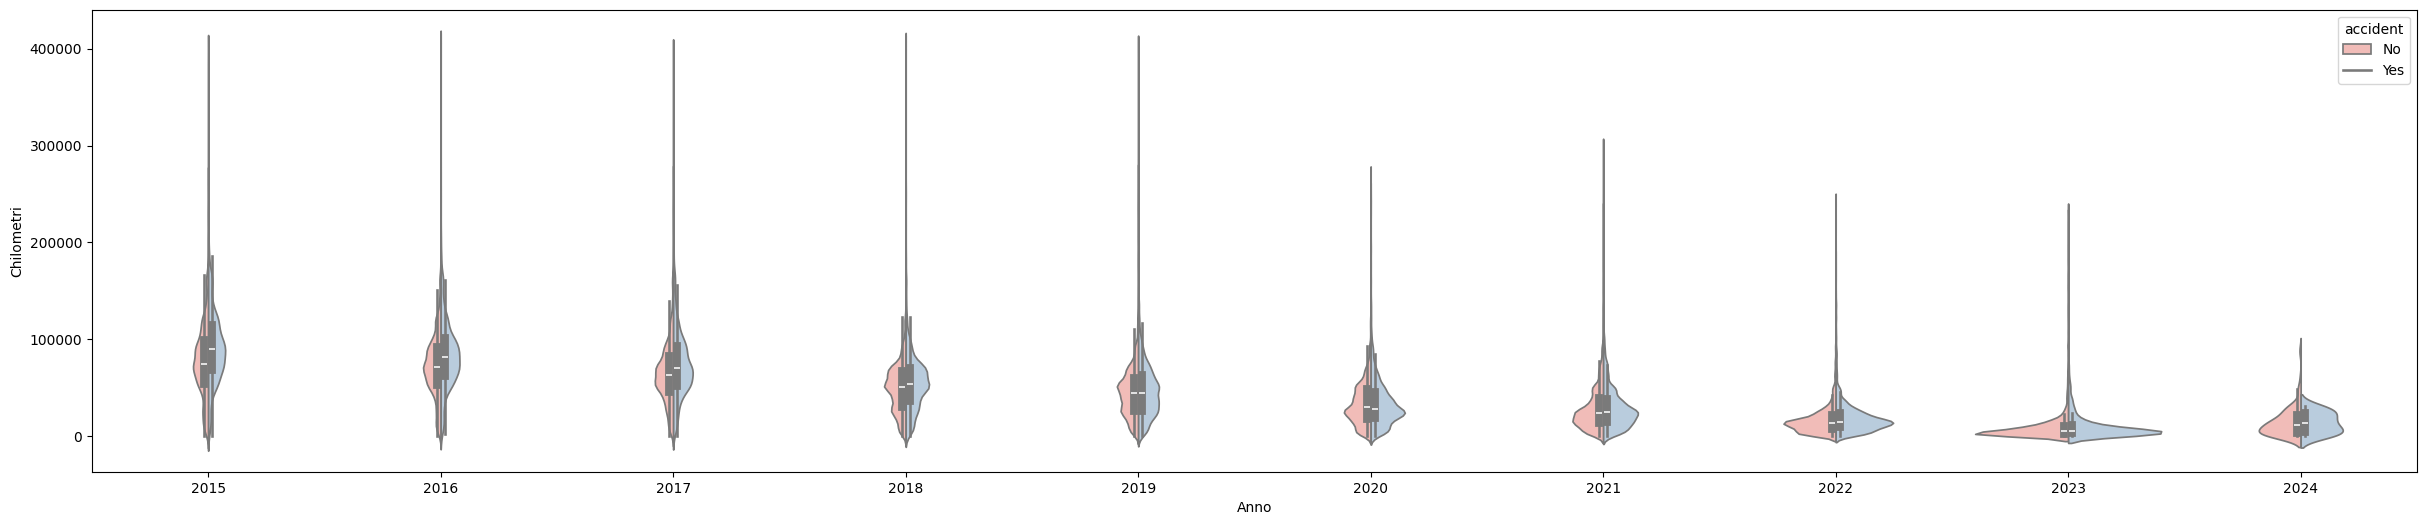

In [ ]:
# Plotting
plt.figure(figsize=(30,6))
sns.violinplot(x='model_year', y='milage', hue='accident', data=df[df['model_year']<2005], split=True, palette='Pastel1')
# plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Anno')
plt.ylabel('Chilometri')
plt.legend(title='accident', labels=['No', 'Yes'])
plt.show()
plt.figure(figsize=(30,6))
sns.violinplot(x='model_year', y='milage', hue='accident', data=df[(df['model_year']>=2005)& (df['model_year']<2015)], split=True, palette='Pastel1')
# plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Anno')
plt.ylabel('Chilometri')
plt.legend(title='accident', labels=['No', 'Yes'])
plt.show()
plt.figure(figsize=(30,6))
sns.violinplot(x='model_year', y='milage', hue='accident', data=df[df['model_year']>=2015], split=True, palette='Pastel1')
# plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Anno')
plt.ylabel('Chilometri')
plt.legend(title='accident', labels=['No', 'Yes'])
plt.show()

#distribuzione dei chilometraggi in base all'anno di modello con distinzione tra veicoli con e senza incidenti
#la forma del violino è la densità dei dati, più larga più veicoli con un determinato chilometraggio, ci aiuta ad individuare differenze
#significative tra le due categorie, quindi differenze nel chilometreggio tra veicoli incidentati e non e variazioni del chilometraggio per anno di modello.


In [1775]:
# Convert 'Sex' back to categorical labels for better readability
# df['Sex_cat'] = df['Sex'].map({0: 'Male', 1: 'Female'})

# # Plotting
# plt.figure(figsize=(10,6))
# sns.violinplot(x='Sex_cat', y='Age', hue='Survived', data=df, split=True, palette={0:'lightcoral', 1:'lightgreen'})
# plt.title('Age Distribution by Gender and Survival')
# plt.xlabel('Gender')
# plt.ylabel('Age')
# plt.legend(title='Survived', labels=['No', 'Yes'])
# plt.show()

In [1776]:
# Convert 'Sex' back to categorical labels for better readability
# df['Sex_cat'] = df['Sex'].map({0: 'Male', 1: 'Female'})

# # Plotting
# plt.figure(figsize=(10,6))
# sns.violinplot(x='Sex_cat', y='Age', hue='Survived', data=df, split=True, palette={0:'lightcoral', 1:'lightgreen'})
# plt.title('Age Distribution by Gender and Survival')
# plt.xlabel('Gender')
# plt.ylabel('Age')
# plt.legend(title='Survived', labels=['No', 'Yes'])
# plt.show()

In [1777]:
# Selecting relevant features
# sns.pairplot(df[['Survived', 'Pclass', 'Sex_cat', 'Age', 'SibSp', 'Parch', 'Fare']], hue='Survived', palette={0:'red', 1:'green'}, diag_kind='kde')
# plt.suptitle('Pair Plot of Titanic Features by Survival', y=1.02)
# plt.show()